In [206]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [207]:
df = pd.read_csv('F:\\Campus\\Research\\datasets\\aws\\aws.csv')
df.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (11,29,30,31,32,33,34,35,37,40,41,42,43,44,45,46,52,55,56,79,80,82) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


SKU OfferTermCode                                RateCode  \
0  YQHNG5NBWUE3D67S    4NA7Y494T4  YQHNG5NBWUE3D67S.4NA7Y494T4.6YS6EN2CT7   
1  38UAGGZF2TPDQSYB    Z2E3P23VKM  38UAGGZF2TPDQSYB.Z2E3P23VKM.6YS6EN2CT7   
2  FS9HBBMCNT422SDM    38NPMPTW36  FS9HBBMCNT422SDM.38NPMPTW36.6YS6EN2CT7   
3  AF4M9XS62QDH5P8S    BPH4J8HBKS  AF4M9XS62QDH5P8S.BPH4J8HBKS.6YS6EN2CT7   
4  TDQJ4JGM4HQ9852M    R5XV2EPZQZ  TDQJ4JGM4HQ9852M.R5XV2EPZQZ.2TG2D8R56U   

   TermType                                   PriceDescription EffectiveDate  \
0  Reserved  Red Hat Enterprise Linux (Amazon VPC), m4.xlar...    2017-04-30   
1  Reserved  Linux/UNIX (Amazon VPC), t4g.medium reserved i...    2020-09-01   
2  Reserved  Windows with SQL Server Enterprise (Amazon VPC...    2020-04-01   
3  Reserved  Linux/UNIX (Amazon VPC), i3.xlarge reserved in...    2017-04-30   
4  Reserved                                        Upfront Fee    2018-03-31   

   StartingRange  EndingRange      Unit  PricePerUnit  ...  \
0            0.0          inf       Hrs        0.1963  ...   
1            0.0          inf       Hrs        0.0167  ...   
2            0.0          inf       Hrs       22.0310  ...   
3            0.0          inf       Hrs        0.1950  ...   
4            NaN          NaN  Quantity     6972.0000  ...   

  Intel AVX2 Available Intel Turbo Available Normalization Size Factor  \
0                  Yes                   Yes                       8.0   
1                   No                    No                       2.0   
2                   No                    No                     192.0   
3                  Yes                   Yes                       8.0   
4                  Yes                   Yes                       4.0   

  Physical Cores Pre Installed S/W                  Processor Features  \
0            NaN               NaN  Intel AVX; Intel AVX2; Intel Turbo   
1            NaN               NaN                                 NaN   
2            NaN           SQL Ent                                 NaN   
3            NaN               NaN  Intel AVX; Intel AVX2; Intel Turbo   
4            NaN           SQL Std  Intel AVX; Intel AVX2; Intel Turbo   

  Product Type Resource Type                   serviceName Volume API Name  
0          NaN           NaN  Amazon Elastic Compute Cloud             NaN  
1          NaN           NaN  Amazon Elastic Compute Cloud             NaN  
2          NaN           NaN  Amazon Elastic Compute Cloud             NaN  
3          NaN           NaN  Amazon Elastic Compute Cloud             NaN  
4          NaN           NaN  Amazon Elastic Compute Cloud             NaN  

[5 rows x 83 columns]

In [208]:
df.columns 

Index(['SKU', 'OfferTermCode', 'RateCode', 'TermType', 'PriceDescription',
       'EffectiveDate', 'StartingRange', 'EndingRange', 'Unit', 'PricePerUnit',
       'Currency', 'RelatedTo', 'LeaseContractLength', 'PurchaseOption',
       'OfferingClass', 'Product Family', 'serviceCode', 'Location',
       'Location Type', 'Instance Type', 'Current Generation',
       'Instance Family', 'vCPU', 'Physical Processor', 'Clock Speed',
       'Memory', 'Storage', 'Network Performance', 'Processor Architecture',
       'Storage Media', 'Volume Type', 'Max Volume Size', 'Max IOPS/volume',
       'Max IOPS Burst Performance', 'Max throughput/volume', 'Provisioned',
       'Tenancy', 'EBS Optimized', 'Operating System', 'License Model',
       'Group', 'Group Description', 'Transfer Type', 'From Location',
       'From Location Type', 'To Location', 'To Location Type', 'usageType',
       'operation', 'CapacityStatus', 'Dedicated EBS Throughput', 'ECU',
       'Elastic Graphics Type', 'Enhanced Net

In [209]:
ncolumns = ['EffectiveDate','Unit', 'PricePerUnit', 'Currency', 'LeaseContractLength', 'PurchaseOption', 'OfferingClass', 'Location', 'Location Type', 'Instance Type','Instance Family', 'Memory', 'vCPU', 'Network Performance', 'Clock Speed', 'Operating System']
# df = df.reindex(columns=ncolumns)
df = df[ncolumns]

df_init = df.copy()
df_init.head()

EffectiveDate      Unit  PricePerUnit Currency LeaseContractLength  \
0    2017-04-30       Hrs        0.1963      USD                 1yr   
1    2020-09-01       Hrs        0.0167      USD                 3yr   
2    2020-04-01       Hrs       22.0310      USD                 3yr   
3    2017-04-30       Hrs        0.1950      USD                 3yr   
4    2018-03-31  Quantity     6972.0000      USD                 3yr   

    PurchaseOption OfferingClass                Location Location Type  \
0       No Upfront      standard          US East (Ohio)    AWS Region   
1       No Upfront   convertible        US West (Oregon)    AWS Region   
2  Partial Upfront      standard  AWS GovCloud (US-West)    AWS Region   
3       No Upfront      standard    Asia Pacific (Tokyo)    AWS Region   
4  Partial Upfront   convertible   US East (N. Virginia)    AWS Region   

  Instance Type    Instance Family    Memory  vCPU Network Performance  \
0     m4.xlarge    General purpose    16 GiB   4.0                High   
1    t4g.medium    General purpose     4 GiB   2.0     Up to 5 Gigabit   
2    r5dn.metal   Memory optimized   768 GiB  96.0         100 Gigabit   
3     i3.xlarge  Storage optimized  30.5 GiB   4.0    Up to 10 Gigabit   
4      m4.large    General purpose     8 GiB   2.0            Moderate   

  Clock Speed Operating System  
0     2.4 GHz             RHEL  
1     2.5 GHz            Linux  
2     3.1 GHz          Windows  
3     2.3 GHz            Linux  
4     2.4 GHz            Linux

In [210]:
df_init.columns = [column.replace(' ', '_') for column in df_init.columns]
df_init.head()

EffectiveDate      Unit  PricePerUnit Currency LeaseContractLength  \
0    2017-04-30       Hrs        0.1963      USD                 1yr   
1    2020-09-01       Hrs        0.0167      USD                 3yr   
2    2020-04-01       Hrs       22.0310      USD                 3yr   
3    2017-04-30       Hrs        0.1950      USD                 3yr   
4    2018-03-31  Quantity     6972.0000      USD                 3yr   

    PurchaseOption OfferingClass                Location Location_Type  \
0       No Upfront      standard          US East (Ohio)    AWS Region   
1       No Upfront   convertible        US West (Oregon)    AWS Region   
2  Partial Upfront      standard  AWS GovCloud (US-West)    AWS Region   
3       No Upfront      standard    Asia Pacific (Tokyo)    AWS Region   
4  Partial Upfront   convertible   US East (N. Virginia)    AWS Region   

  Instance_Type    Instance_Family    Memory  vCPU Network_Performance  \
0     m4.xlarge    General purpose    16 GiB   4.0                High   
1    t4g.medium    General purpose     4 GiB   2.0     Up to 5 Gigabit   
2    r5dn.metal   Memory optimized   768 GiB  96.0         100 Gigabit   
3     i3.xlarge  Storage optimized  30.5 GiB   4.0    Up to 10 Gigabit   
4      m4.large    General purpose     8 GiB   2.0            Moderate   

  Clock_Speed Operating_System  
0     2.4 GHz             RHEL  
1     2.5 GHz            Linux  
2     3.1 GHz          Windows  
3     2.3 GHz            Linux  
4     2.4 GHz            Linux

In [211]:
df_init["EffectiveDate"] = df_init["EffectiveDate"].astype("datetime64")
df_init["PricePerUnit"] = df_init["PricePerUnit"].astype(float)
print(df_init.dtypes)

EffectiveDate          datetime64[ns]
Unit                           object
PricePerUnit                  float64
Currency                       object
LeaseContractLength            object
PurchaseOption                 object
OfferingClass                  object
Location                       object
Location_Type                  object
Instance_Type                  object
Instance_Family                object
Memory                         object
vCPU                          float64
Network_Performance            object
Clock_Speed                    object
Operating_System               object
dtype: object


In [212]:
df_init.isnull().sum()

EffectiveDate               0
Unit                        0
PricePerUnit                0
Currency                    0
LeaseContractLength    286975
PurchaseOption         286975
OfferingClass          286975
Location                  170
Location_Type             170
Instance_Type            1158
Instance_Family          1158
Memory                   7707
vCPU                     1158
Network_Performance      7712
Clock_Speed             54535
Operating_System         2235
dtype: int64

In [213]:
# Drop all rows with NaNs in Location OR Memory OR Network Performance OR Instance Type
nan_columns = ['Location','Instance_Type','Instance_Family', 'Memory', 'Clock_Speed', 'Network_Performance', 'Operating_System']

for column in nan_columns:
     df_init.dropna(subset = [column], inplace=True)

df_init.isnull().sum()

EffectiveDate               0
Unit                        0
PricePerUnit                0
Currency                    0
LeaseContractLength    276131
PurchaseOption         276131
OfferingClass          276131
Location                    0
Location_Type               0
Instance_Type               0
Instance_Family             0
Memory                      0
vCPU                        0
Network_Performance         0
Clock_Speed                 0
Operating_System            0
dtype: int64

In [214]:
df_init['Location_Type'].value_counts()

AWS Region             1833949
AWS Wavelength Zone       1416
AWS Local Zone             396
Name: Location_Type, dtype: int64

In [215]:
# According to Above results, other types have small number of rows, then we can drop that column because only one column type remain after remove other rows.
# df_init = df_init[df_init['Location Type'] =='AWS Region'] 
# df_init['Location Type'].value_counts()
del df_init['Location_Type']
df_init.head()

EffectiveDate      Unit  PricePerUnit Currency LeaseContractLength  \
0    2017-04-30       Hrs        0.1963      USD                 1yr   
1    2020-09-01       Hrs        0.0167      USD                 3yr   
2    2020-04-01       Hrs       22.0310      USD                 3yr   
3    2017-04-30       Hrs        0.1950      USD                 3yr   
4    2018-03-31  Quantity     6972.0000      USD                 3yr   

    PurchaseOption OfferingClass                Location Instance_Type  \
0       No Upfront      standard          US East (Ohio)     m4.xlarge   
1       No Upfront   convertible        US West (Oregon)    t4g.medium   
2  Partial Upfront      standard  AWS GovCloud (US-West)    r5dn.metal   
3       No Upfront      standard    Asia Pacific (Tokyo)     i3.xlarge   
4  Partial Upfront   convertible   US East (N. Virginia)      m4.large   

     Instance_Family    Memory  vCPU Network_Performance Clock_Speed  \
0    General purpose    16 GiB   4.0                High     2.4 GHz   
1    General purpose     4 GiB   2.0     Up to 5 Gigabit     2.5 GHz   
2   Memory optimized   768 GiB  96.0         100 Gigabit     3.1 GHz   
3  Storage optimized  30.5 GiB   4.0    Up to 10 Gigabit     2.3 GHz   
4    General purpose     8 GiB   2.0            Moderate     2.4 GHz   

  Operating_System  
0             RHEL  
1            Linux  
2          Windows  
3            Linux  
4            Linux

In [216]:
df_init['Currency'].value_counts()

USD    1835761
Name: Currency, dtype: int64

In [217]:
# Currency has only one type, then that column can remove
del df_init['Currency']
df_init.head()

EffectiveDate      Unit  PricePerUnit LeaseContractLength   PurchaseOption  \
0    2017-04-30       Hrs        0.1963                 1yr       No Upfront   
1    2020-09-01       Hrs        0.0167                 3yr       No Upfront   
2    2020-04-01       Hrs       22.0310                 3yr  Partial Upfront   
3    2017-04-30       Hrs        0.1950                 3yr       No Upfront   
4    2018-03-31  Quantity     6972.0000                 3yr  Partial Upfront   

  OfferingClass                Location Instance_Type    Instance_Family  \
0      standard          US East (Ohio)     m4.xlarge    General purpose   
1   convertible        US West (Oregon)    t4g.medium    General purpose   
2      standard  AWS GovCloud (US-West)    r5dn.metal   Memory optimized   
3      standard    Asia Pacific (Tokyo)     i3.xlarge  Storage optimized   
4   convertible   US East (N. Virginia)      m4.large    General purpose   

     Memory  vCPU Network_Performance Clock_Speed Operating_System  
0    16 GiB   4.0                High     2.4 GHz             RHEL  
1     4 GiB   2.0     Up to 5 Gigabit     2.5 GHz            Linux  
2   768 GiB  96.0         100 Gigabit     3.1 GHz          Windows  
3  30.5 GiB   4.0    Up to 10 Gigabit     2.3 GHz            Linux  
4     8 GiB   2.0            Moderate     2.4 GHz            Linux

In [218]:
df_init['Unit'].value_counts()

Hrs         1209485
Quantity     625732
Hours           544
Name: Unit, dtype: int64

In [219]:
# 'Unit' column has many types rows. So, we can see same category as same name like ['Hrs', 'Hours', 'hours'], ['Quantity', 'Count']. 
# Other type has diffeent meaning, as well as those types have only small number of quantity
# We can merger 'hours' and 'Quantity', and others can remove
df_init = df_init[(df_init['Unit'] =='Hours') | (df_init['Unit'] =='Hrs') | (df_init['Unit'] =='Quantity') | (df_init['Unit'] =='Count')]
num_of_unit_categories = {'Hours': 'Hours','Hrs': 'Hours', 'hours': 'Hours', 'Count':'Quantity','Quantity':'Quantity'}
df_init['Unit'] = [num_of_unit_categories[x] for x in df_init['Unit']]
df_init['Unit'].value_counts()

# 'Quantity' means 'Upfront Fee' rows, and 'Hours' means 'On Demand' rows

Hours       1210029
Quantity     625732
Name: Unit, dtype: int64

In [220]:
df_init['Instance_Family'].value_counts()

Memory optimized     596563
General purpose      558420
Compute optimized    408552
Storage optimized    202930
GPU instance          67448
FPGA Instances         1848
Name: Instance_Family, dtype: int64

In [221]:
df_init['Year'] = pd.DatetimeIndex(df_init['EffectiveDate']).year 
# df_init['Month'] = pd.DatetimeIndex(df_init['EffectiveDate']).month
del df_init['EffectiveDate']
df_init.head()

Unit  PricePerUnit LeaseContractLength   PurchaseOption OfferingClass  \
0     Hours        0.1963                 1yr       No Upfront      standard   
1     Hours        0.0167                 3yr       No Upfront   convertible   
2     Hours       22.0310                 3yr  Partial Upfront      standard   
3     Hours        0.1950                 3yr       No Upfront      standard   
4  Quantity     6972.0000                 3yr  Partial Upfront   convertible   

                 Location Instance_Type    Instance_Family    Memory  vCPU  \
0          US East (Ohio)     m4.xlarge    General purpose    16 GiB   4.0   
1        US West (Oregon)    t4g.medium    General purpose     4 GiB   2.0   
2  AWS GovCloud (US-West)    r5dn.metal   Memory optimized   768 GiB  96.0   
3    Asia Pacific (Tokyo)     i3.xlarge  Storage optimized  30.5 GiB   4.0   
4   US East (N. Virginia)      m4.large    General purpose     8 GiB   2.0   

  Network_Performance Clock_Speed Operating_System  Year  
0                High     2.4 GHz             RHEL  2017  
1     Up to 5 Gigabit     2.5 GHz            Linux  2020  
2         100 Gigabit     3.1 GHz          Windows  2020  
3    Up to 10 Gigabit     2.3 GHz            Linux  2017  
4            Moderate     2.4 GHz            Linux  2018

In [222]:
df_init['Location'].value_counts()

US West (Oregon)                              125541
US East (N. Virginia)                         125408
EU (Ireland)                                  121178
Asia Pacific (Tokyo)                          116267
EU (Frankfurt)                                115498
Asia Pacific (Singapore)                      115389
US East (Ohio)                                113023
Asia Pacific (Sydney)                          96881
AWS GovCloud (US-West)                         96088
US West (N. California)                        89556
Asia Pacific (Seoul)                           82402
Asia Pacific (Mumbai)                          81987
South America (Sao Paulo)                      81857
Canada (Central)                               76311
EU (London)                                    75232
EU (Paris)                                     54646
AWS GovCloud (US-East)                         54456
EU (Stockholm)                                 45464
Asia Pacific (Hong Kong)                      

In [223]:
df_init['Network_Performance'].value_counts()

Up to 10 Gigabit    619451
10 Gigabit          235650
25 Gigabit          222795
Up to 25 Gigabit    159342
20 Gigabit          133816
High                116156
100 Gigabit          76631
Up to 5 Gigabit      67631
12 Gigabit           58317
Moderate             57240
50 Gigabit           54833
75 Gigabit           15908
Low to Moderate       9149
Up to 15 Gigabit      5520
40 Gigabit            1380
Low                   1162
15 Gigabit             564
400 Gigabit            216
Name: Network_Performance, dtype: int64

In [224]:
# We can see lot of country locations. So, some are low numbers of rows, then we can combine those as general location
num_of_network_performance_categories = {
    'Low': 'Up to 5 Gigabit',
    'Up to 5 Gigabit': 'Up to 5 Gigabit',
    'Up to 10 Gigabit': 'Up to 10 Gigabit',
    '10 Gigabit': '10 Gigabit', 
    '12 Gigabit': '12 Gigabit',
    'Low to Moderate': '12 Gigabit',
    'Up to 15 Gigabit': '12 Gigabit',
    '15 Gigabit': '12 Gigabit',
    'Moderate': '20 Gigabit',
    '20 Gigabit': '20 Gigabit', 
    'High':'High', 
    'Up to 25 Gigabit': 'Up to 25 Gigabit',
    '25 Gigabit': '25 Gigabit', 
    '40 Gigabit':'25 Gigabit',
    '100 Gigabit':'100 Gigabit',
    '50 Gigabit':'100 Gigabit',
    '75 Gigabit':'100 Gigabit',
    '400 Gigabit':'100 Gigabit'
    }

df_init['Network_Performance'] = df_init.Network_Performance.map(num_of_network_performance_categories)
df_init['Network_Performance'].value_counts()

Up to 10 Gigabit    619451
10 Gigabit          235650
25 Gigabit          224175
20 Gigabit          191056
Up to 25 Gigabit    159342
100 Gigabit         147588
High                116156
12 Gigabit           73550
Up to 5 Gigabit      68793
Name: Network_Performance, dtype: int64

In [225]:
# We can see lot of country locations. So, some are low numbers of rows, then we can combine those as general location
num_of_location_categories = {
    'US West (Oregon)': 'US West',
    'US East (N. Virginia)': 'US East', 
    'EU (Ireland)': 'EU', 
    'Asia Pacific (Tokyo)':'Asia Pacific', 
    'Asia Pacific (Singapore)':'Asia Pacific',
    'EU (Frankfurt)': 'EU',
    'US East (Ohio)':'US East',
    'Asia Pacific (Sydney)':'Asia Pacific',
    'AWS GovCloud (US-West)':'AWS GovCloud',
    'US West (N. California)':'US West',
    'South America (Sao Paulo)':'South America',
    'Asia Pacific (Seoul)':'Asia Pacific',
    'Asia Pacific (Mumbai)':'Asia Pacific',
    'Canada (Central)':'Canada',
    'EU (London)':'EU',
    'AWS GovCloud (US-East)':'AWS GovCloud',
    'EU (Paris)':'EU',
    'EU (Stockholm)':'EU',
    'Asia Pacific (Hong Kong)':'Asia Pacific',
    'Africa (Cape Town)':'Africa',
    'EU (Milan)':'EU',
    'Middle East (Bahrain)':'Middle East',
    'Asia Pacific (Osaka-Local)':'Asia Pacific',
    'US West (Los Angeles)':'US West',
    'US East (Boston)':'US East',
    'US East (Miami)':'US East',
    'US East (Houston)':'US East',
    'US East (Verizon) - Miami':'US East',
    'Asia Pacific (KDDI) - Osaka':'Asia Pacific',
    'US East (Verizon) - Atlanta':'US East',
    'US West (Verizon) - Denver':'US West',
    'US West (Verizon) - Seattle':'US West',
    'US West (Verizon) - Las Vegas':'US West',
    'Asia Pacific (KDDI) - Tokyo':'Asia Pacific',
    'US West (Verizon) - San Francisco Bay Area':'US West',
    'US East (Verizon) - Washington DC':'US East',
    'US East (Verizon) - Dallas':'US East',
    'US East (Verizon) - New York':'US East',
    'US East (Verizon) - Boston':'US East',
    'Asia Pacific (SKT) - Daejeon':'Asia Pacific',

    }

df_init['Location'] = df_init.Location.map(num_of_location_categories)
df_init['Location'].value_counts()

Asia Pacific     556832
EU               444636
US East          239487
US West          219260
AWS GovCloud     150544
South America     81857
Canada            76311
Africa            36378
Middle East       30456
Name: Location, dtype: int64

In [226]:
df_init.head()

Unit  PricePerUnit LeaseContractLength   PurchaseOption OfferingClass  \
0     Hours        0.1963                 1yr       No Upfront      standard   
1     Hours        0.0167                 3yr       No Upfront   convertible   
2     Hours       22.0310                 3yr  Partial Upfront      standard   
3     Hours        0.1950                 3yr       No Upfront      standard   
4  Quantity     6972.0000                 3yr  Partial Upfront   convertible   

       Location Instance_Type    Instance_Family    Memory  vCPU  \
0       US East     m4.xlarge    General purpose    16 GiB   4.0   
1       US West    t4g.medium    General purpose     4 GiB   2.0   
2  AWS GovCloud    r5dn.metal   Memory optimized   768 GiB  96.0   
3  Asia Pacific     i3.xlarge  Storage optimized  30.5 GiB   4.0   
4       US East      m4.large    General purpose     8 GiB   2.0   

  Network_Performance Clock_Speed Operating_System  Year  
0                High     2.4 GHz             RHEL  2017  
1     Up to 5 Gigabit     2.5 GHz            Linux  2020  
2         100 Gigabit     3.1 GHz          Windows  2020  
3    Up to 10 Gigabit     2.3 GHz            Linux  2017  
4          20 Gigabit     2.4 GHz            Linux  2018

In [227]:
df_init['Memory'] = df_init['Memory'].str.extract('(\d+)')
df_init['Clock_Speed'] = df_init['Clock_Speed'].str.extract(r'(\d+.\d+)').astype('float')

In [228]:
# Now we want to devide dataset like 'Reserve Dataset' and 'On Demand' dataset
df_on_demand = df_init[df_init['LeaseContractLength'].isnull()] 
df_on_demand = df_on_demand.drop(['LeaseContractLength', 'PurchaseOption', 'OfferingClass'], axis=1)
df_on_demand.head()

Unit  PricePerUnit      Location  Instance_Type    Instance_Family  \
8   Hours         0.368       US West      m3.xlarge    General purpose   
19  Hours        20.295  Asia Pacific    x1.16xlarge   Memory optimized   
29  Hours         5.542       US East  r5ad.12xlarge   Memory optimized   
43  Hours         0.000       US West     i3en.metal  Storage optimized   
51  Hours         3.192  Asia Pacific   r5ad.4xlarge   Memory optimized   

   Memory  vCPU Network_Performance  Clock_Speed Operating_System  Year  
8      15   4.0                High          2.5             RHEL  2021  
19    976  64.0                High          2.3          Windows  2021  
29    384  48.0          10 Gigabit          2.5          Windows  2021  
43    768  96.0         100 Gigabit          3.1            Linux  2021  
51    128  16.0    Up to 10 Gigabit          2.5            Linux  2021

In [229]:
df_init['LeaseContractLength'].value_counts()

1yr    782246
3yr    777384
Name: LeaseContractLength, dtype: int64

In [230]:
# We can merger '1yr' and '3yr' from 'LeaseContractLength' column
df_reserved = df_init[(df_init['LeaseContractLength'] == '1yr') | (df_init['LeaseContractLength'] == '3yr') | (df_init['LeaseContractLength'] == '1 yr') | (df_init['LeaseContractLength'] == '3 yr')] 
num_of_leaseContractLength_categories = {'1yr': '1yr','1 yr': '1yr', '3yr': '3yr', '3 yr':'3yr'}
df_reserved['LeaseContractLength'] = [num_of_leaseContractLength_categories[x] for x in df_reserved['LeaseContractLength']]
df_reserved['LeaseContractLength'].value_counts()
df_reserved.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Unit  PricePerUnit LeaseContractLength   PurchaseOption OfferingClass  \
0     Hours        0.1963                 1yr       No Upfront      standard   
1     Hours        0.0167                 3yr       No Upfront   convertible   
2     Hours       22.0310                 3yr  Partial Upfront      standard   
3     Hours        0.1950                 3yr       No Upfront      standard   
4  Quantity     6972.0000                 3yr  Partial Upfront   convertible   

       Location Instance_Type    Instance_Family Memory  vCPU  \
0       US East     m4.xlarge    General purpose     16   4.0   
1       US West    t4g.medium    General purpose      4   2.0   
2  AWS GovCloud    r5dn.metal   Memory optimized    768  96.0   
3  Asia Pacific     i3.xlarge  Storage optimized     30   4.0   
4       US East      m4.large    General purpose      8   2.0   

  Network_Performance  Clock_Speed Operating_System  Year  
0                High          2.4             RHEL  2017  
1     Up to 5 Gigabit          2.5            Linux  2020  
2         100 Gigabit          3.1          Windows  2020  
3    Up to 10 Gigabit          2.3            Linux  2017  
4          20 Gigabit          2.4            Linux  2018

In [231]:
df_init['PurchaseOption'].value_counts()

All Upfront        625738
Partial Upfront    625726
No Upfront         308166
Name: PurchaseOption, dtype: int64

In [232]:
num_of_purchaseOption_categories = {'All Upfront': 'AllUpfront','AllUpfront': 'AllUpfront', 'Partial Upfront': 'PartialUpfront', 'PartialUpfront':'PartialUpfront', 'No Upfront': 'NoUpfront', 'NoUpfront':'NoUpfront'}
df_reserved['PurchaseOption'] = [num_of_purchaseOption_categories[x] for x in df_reserved['PurchaseOption']]
df_reserved['PurchaseOption'].value_counts()
df_reserved.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Unit  PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
0     Hours        0.1963                 1yr       NoUpfront      standard   
1     Hours        0.0167                 3yr       NoUpfront   convertible   
2     Hours       22.0310                 3yr  PartialUpfront      standard   
3     Hours        0.1950                 3yr       NoUpfront      standard   
4  Quantity     6972.0000                 3yr  PartialUpfront   convertible   

       Location Instance_Type    Instance_Family Memory  vCPU  \
0       US East     m4.xlarge    General purpose     16   4.0   
1       US West    t4g.medium    General purpose      4   2.0   
2  AWS GovCloud    r5dn.metal   Memory optimized    768  96.0   
3  Asia Pacific     i3.xlarge  Storage optimized     30   4.0   
4       US East      m4.large    General purpose      8   2.0   

  Network_Performance  Clock_Speed Operating_System  Year  
0                High          2.4             RHEL  2017  
1     Up to 5 Gigabit          2.5            Linux  2020  
2         100 Gigabit          3.1          Windows  2020  
3    Up to 10 Gigabit          2.3            Linux  2017  
4          20 Gigabit          2.4            Linux  2018

In [233]:
df_reserved.dtypes

Unit                    object
PricePerUnit           float64
LeaseContractLength     object
PurchaseOption          object
OfferingClass           object
Location                object
Instance_Type           object
Instance_Family         object
Memory                  object
vCPU                   float64
Network_Performance     object
Clock_Speed            float64
Operating_System        object
Year                     int64
dtype: object

In [234]:
df_reserved['Unit'].value_counts()

Hours       933898
Quantity    625732
Name: Unit, dtype: int64

In [235]:
 # We can divide Hours
df_reserved_hours = df_reserved[(df_init['Unit'] == 'Hours') | (['PurchaseOption'] == 'NoUpfront') | (['PurchaseOption'] == 'PartialUpfront')] 
df_reserved_hours = df_reserved_hours.drop(['Unit'], axis=1)
df_reserved_hours.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
0        0.1963                 1yr       NoUpfront      standard   
1        0.0167                 3yr       NoUpfront   convertible   
2       22.0310                 3yr  PartialUpfront      standard   
3        0.1950                 3yr       NoUpfront      standard   
6       13.1860                 3yr       NoUpfront   convertible   

       Location Instance_Type    Instance_Family Memory  vCPU  \
0       US East     m4.xlarge    General purpose     16   4.0   
1       US West    t4g.medium    General purpose      4   2.0   
2  AWS GovCloud    r5dn.metal   Memory optimized    768  96.0   
3  Asia Pacific     i3.xlarge  Storage optimized     30   4.0   
6       US East   r5d.8xlarge   Memory optimized    256  32.0   

  Network_Performance  Clock_Speed Operating_System  Year  
0                High          2.4             RHEL  2017  
1     Up to 5 Gigabit          2.5            Linux  2020  
2         100 Gigabit          3.1          Windows  2020  
3    Up to 10 Gigabit          2.3            Linux  2017  
6          10 Gigabit          3.1            Linux  2019

In [236]:
 # We can divide Quantity
df_reserved_quantity = df_reserved[(df_init['Unit'] == 'Quantity') | (['PurchaseOption'] == 'AllUpfront') | (['PurchaseOption'] == 'PartialUpfront')] 
df_reserved_quantity = df_reserved_quantity.drop(['Unit'], axis=1)
df_reserved_quantity.head()

C:\Users\shali\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4         6972.0                 3yr  PartialUpfront   convertible   
5       168565.0                 3yr      AllUpfront      standard   
7        27573.0                 3yr      AllUpfront      standard   
13      180195.0                 3yr  PartialUpfront      standard   
14        2028.0                 3yr      AllUpfront      standard   

        Location  Instance_Type    Instance_Family Memory  vCPU  \
4        US East       m4.large    General purpose      8   2.0   
5             EU   r5ad.8xlarge   Memory optimized    256  32.0   
7             EU  c6gd.16xlarge  Compute optimized    128  64.0   
13            EU      c5n.metal  Compute optimized    192  72.0   
14  Asia Pacific       t2.large    General purpose      8   2.0   

   Network_Performance  Clock_Speed Operating_System  Year  
4           20 Gigabit          2.4            Linux  2018  
5     Up to 10 Gigabit          2.5          Windows  2020  
7           25 Gigabit          2.5            Linux  2020  
13         100 Gigabit          NaN          Windows  2020  
14          12 Gigabit          3.3          Windows  2017

General purpose

In [237]:
df_reserved_quantity_general = df_reserved_quantity[(df_reserved_quantity['Instance_Family'] == 'General purpose')] 
df_reserved_quantity_general = df_reserved_quantity_general.drop(['Instance_Family'], axis=1)
df_reserved_quantity_general.head()

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4         6972.0                 3yr  PartialUpfront   convertible   
14        2028.0                 3yr      AllUpfront      standard   
27       20835.0                 3yr  PartialUpfront      standard   
28       40369.0                 1yr      AllUpfront      standard   
73      114945.0                 3yr  PartialUpfront   convertible   

        Location  Instance_Type Memory  vCPU Network_Performance  Clock_Speed  \
4        US East       m4.large      8   2.0          20 Gigabit          2.4   
14  Asia Pacific       t2.large      8   2.0          12 Gigabit          3.3   
27       US West  m5zn.12xlarge    192  48.0         100 Gigabit          4.5   
28            EU   m5a.24xlarge    384  96.0          20 Gigabit          2.5   
73  Asia Pacific   m5d.24xlarge    384  96.0          25 Gigabit          3.1   

   Operating_System  Year  
4             Linux  2018  
14          Windows  2017  
27             RHEL  2020  
28            Linux  2020  
73          Windows  2019

In [238]:
df_reserved_quantity_general['Instance_Type'].value_counts()

m5.metal        3600
m5d.metal       3600
m5.16xlarge     3600
m5d.8xlarge     3600
m5d.12xlarge    3600
                ... 
t4g.medium       312
t4g.2xlarge      312
t4g.xlarge       312
t4g.large        312
t4g.nano         208
Name: Instance_Type, Length: 112, dtype: int64

In [239]:
df_reserved_quantity_general.dtypes

PricePerUnit           float64
LeaseContractLength     object
PurchaseOption          object
OfferingClass           object
Location                object
Instance_Type           object
Memory                  object
vCPU                   float64
Network_Performance     object
Clock_Speed            float64
Operating_System        object
Year                     int64
dtype: object

In [240]:
df_reserved_quantity_general['Year'] = df_reserved_quantity_general['Year'].astype(str)
df_reserved_quantity_general['vCPU'] = df_reserved_quantity_general['vCPU'].astype(int)
df_reserved_quantity_general['vCPU'] = df_reserved_quantity_general['vCPU'].astype(str)
df_reserved_quantity_general.dtypes

PricePerUnit           float64
LeaseContractLength     object
PurchaseOption          object
OfferingClass           object
Location                object
Instance_Type           object
Memory                  object
vCPU                    object
Network_Performance     object
Clock_Speed            float64
Operating_System        object
Year                    object
dtype: object

In [241]:
df_reserved_quantity_general.head()

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4         6972.0                 3yr  PartialUpfront   convertible   
14        2028.0                 3yr      AllUpfront      standard   
27       20835.0                 3yr  PartialUpfront      standard   
28       40369.0                 1yr      AllUpfront      standard   
73      114945.0                 3yr  PartialUpfront   convertible   

        Location  Instance_Type Memory vCPU Network_Performance  Clock_Speed  \
4        US East       m4.large      8    2          20 Gigabit          2.4   
14  Asia Pacific       t2.large      8    2          12 Gigabit          3.3   
27       US West  m5zn.12xlarge    192   48         100 Gigabit          4.5   
28            EU   m5a.24xlarge    384   96          20 Gigabit          2.5   
73  Asia Pacific   m5d.24xlarge    384   96          25 Gigabit          3.1   

   Operating_System  Year  
4             Linux  2018  
14          Windows  2017  
27             RHEL  2020  
28            Linux  2020  
73          Windows  2019

In [242]:
df_res_qty_gn_m4 = df_reserved_quantity_general[df_reserved_quantity_general['Instance_Type'].str.contains('m4')]
df_res_qty_gn_m4.Instance_Type.value_counts()

m4.xlarge      2432
m4.10xlarge    2432
m4.2xlarge     2432
m4.4xlarge     2432
m4.16xlarge    2432
m4.large       1952
Name: Instance_Type, dtype: int64

In [243]:
df_res_qty_gn_m4.drop(df_res_qty_gn_m4[df_res_qty_gn_m4['Instance_Type'] == 'm4'].index, inplace = True)
print(df_res_qty_gn_m4.Instance_Type.value_counts())

m4.xlarge      2432
m4.10xlarge    2432
m4.2xlarge     2432
m4.4xlarge     2432
m4.16xlarge    2432
m4.large       1952
Name: Instance_Type, dtype: int64
C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [244]:
df_res_qty_gn_m4

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4              6972.0                 3yr  PartialUpfront   convertible   
164            5546.0                 1yr      AllUpfront      standard   
530           11778.0                 1yr      AllUpfront      standard   
778           42088.0                 3yr      AllUpfront      standard   
943            6386.0                 3yr      AllUpfront   convertible   
...               ...                 ...             ...           ...   
1896776       10420.0                 1yr      AllUpfront      standard   
1896840       15315.0                 1yr      AllUpfront   convertible   
1897107        4348.0                 3yr      AllUpfront      standard   
1897232       23074.0                 3yr  PartialUpfront      standard   
1897250        1632.0                 3yr  PartialUpfront   convertible   

             Location Instance_Type Memory vCPU Network_Performance  \
4             US East      m4.large      8    2          20 Gigabit   
164      Asia Pacific      m4.large      8    2          20 Gigabit   
530      Asia Pacific    m4.4xlarge     64   16                High   
778           US West     m4.xlarge     16    4                High   
943      Asia Pacific    m4.2xlarge     32    8                High   
...               ...           ...    ...  ...                 ...   
1896776       US East   m4.10xlarge    160   40          10 Gigabit   
1896840       US West    m4.4xlarge     64   16                High   
1897107       US West    m4.2xlarge     32    8                High   
1897232       US West   m4.10xlarge    160   40          10 Gigabit   
1897250       US West     m4.xlarge     16    4                High   

         Clock_Speed Operating_System  Year  
4                2.4            Linux  2018  
164              2.4          Windows  2017  
530              2.4          Windows  2016  
778              2.4            Linux  2018  
943              2.4            Linux  2017  
...              ...              ...   ...  
1896776          2.4             SUSE  2017  
1896840          2.4          Windows  2017  
1897107          2.4            Linux  2017  
1897232          2.4            Linux  2018  
1897250          2.4            Linux  2017  

[14112 rows x 12 columns]

In [245]:
df_reserved_quantity_general.dtypes

PricePerUnit           float64
LeaseContractLength     object
PurchaseOption          object
OfferingClass           object
Location                object
Instance_Type           object
Memory                  object
vCPU                    object
Network_Performance     object
Clock_Speed            float64
Operating_System        object
Year                    object
dtype: object

In [246]:
# We can get RAM, CPU, Network_Performance instead of Instance_Type column
df_rs_qty_gn_rcn = df_reserved_quantity_general.copy()
df_rs_qty_gn_rcn

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4              6972.0                 3yr  PartialUpfront   convertible   
14             2028.0                 3yr      AllUpfront      standard   
27            20835.0                 3yr  PartialUpfront      standard   
28            40369.0                 1yr      AllUpfront      standard   
73           114945.0                 3yr  PartialUpfront   convertible   
...               ...                 ...             ...           ...   
1897237        1214.0                 1yr      AllUpfront   convertible   
1897243        2810.0                 3yr      AllUpfront      standard   
1897246       59415.0                 1yr      AllUpfront   convertible   
1897247        9091.0                 3yr      AllUpfront      standard   
1897250        1632.0                 3yr  PartialUpfront   convertible   

              Location  Instance_Type Memory vCPU Network_Performance  \
4              US East       m4.large      8    2          20 Gigabit   
14        Asia Pacific       t2.large      8    2          12 Gigabit   
27             US West  m5zn.12xlarge    192   48         100 Gigabit   
28                  EU   m5a.24xlarge    384   96          20 Gigabit   
73        Asia Pacific   m5d.24xlarge    384   96          25 Gigabit   
...                ...            ...    ...  ...                 ...   
1897237  South America       m5.large      8    2    Up to 10 Gigabit   
1897243             EU      t3.medium      4    2     Up to 5 Gigabit   
1897246   Asia Pacific    m5d.4xlarge     64   16    Up to 10 Gigabit   
1897247   Asia Pacific    m5zn.xlarge     16    4    Up to 25 Gigabit   
1897250        US West      m4.xlarge     16    4                High   

         Clock_Speed Operating_System  Year  
4                2.4            Linux  2018  
14               3.3          Windows  2017  
27               4.5             RHEL  2020  
28               2.5            Linux  2020  
73               3.1          Windows  2019  
...              ...              ...   ...  
1897237          3.1             SUSE  2019  
1897243          3.1          Windows  2020  
1897246          3.1            Linux  2018  
1897247          4.5          Windows  2020  
1897250          2.4            Linux  2017  

[190676 rows x 12 columns]

In [247]:
df_rs_qty_gn_rcn.drop('Instance_Type', inplace=True, axis=1)
df_rs_qty_gn_rcn

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4              6972.0                 3yr  PartialUpfront   convertible   
14             2028.0                 3yr      AllUpfront      standard   
27            20835.0                 3yr  PartialUpfront      standard   
28            40369.0                 1yr      AllUpfront      standard   
73           114945.0                 3yr  PartialUpfront   convertible   
...               ...                 ...             ...           ...   
1897237        1214.0                 1yr      AllUpfront   convertible   
1897243        2810.0                 3yr      AllUpfront      standard   
1897246       59415.0                 1yr      AllUpfront   convertible   
1897247        9091.0                 3yr      AllUpfront      standard   
1897250        1632.0                 3yr  PartialUpfront   convertible   

              Location Memory vCPU Network_Performance  Clock_Speed  \
4              US East      8    2          20 Gigabit          2.4   
14        Asia Pacific      8    2          12 Gigabit          3.3   
27             US West    192   48         100 Gigabit          4.5   
28                  EU    384   96          20 Gigabit          2.5   
73        Asia Pacific    384   96          25 Gigabit          3.1   
...                ...    ...  ...                 ...          ...   
1897237  South America      8    2    Up to 10 Gigabit          3.1   
1897243             EU      4    2     Up to 5 Gigabit          3.1   
1897246   Asia Pacific     64   16    Up to 10 Gigabit          3.1   
1897247   Asia Pacific     16    4    Up to 25 Gigabit          4.5   
1897250        US West     16    4                High          2.4   

        Operating_System  Year  
4                  Linux  2018  
14               Windows  2017  
27                  RHEL  2020  
28                 Linux  2020  
73               Windows  2019  
...                  ...   ...  
1897237             SUSE  2019  
1897243          Windows  2020  
1897246            Linux  2018  
1897247          Windows  2020  
1897250            Linux  2017  

[190676 rows x 11 columns]

In [248]:
df_rs_qty_gn_rcn.PurchaseOption.value_counts()

PartialUpfront    95338
AllUpfront        95338
Name: PurchaseOption, dtype: int64

In [249]:
# Memory cannot be 0, then it will remove data before training
df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Memory"] == "0")],axis=0,inplace=True)
df_rs_qty_gn_rcn.Memory.value_counts()

32     25984
16     25552
384    24424
8      19704
192    18456
256    17984
64     17688
128    15120
4       4648
2       4216
1       3784
160     2432
48      1600
96      1600
15      1540
30      1540
7       1240
3       1216
Name: Memory, dtype: int64

In [250]:
df_rs_qty_gn_rcn.Year.value_counts()

2020    95632
2019    41648
2018    25764
2017    15455
2021     6448
2016     3781
Name: Year, dtype: int64

In [251]:
# According lack of data, we will remove data of 2016 and 2021
# df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Year"] == "2016")],axis=0,inplace=True)
# df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["Year"] == "2021")],axis=0,inplace=True)
df_rs_qty_gn_rcn.Year.value_counts()

2020    95632
2019    41648
2018    25764
2017    15455
2021     6448
2016     3781
Name: Year, dtype: int64

In [252]:
df_rs_qty_gn_rcn.describe()

PricePerUnit    Clock_Speed
count  1.887280e+05  188728.000000
mean   5.972033e+04       2.938057
std    1.311842e+05       0.494179
min    1.500000e+01       2.300000
25%    2.986000e+03       2.500000
50%    1.469550e+04       3.100000
75%    5.036900e+04       3.100000
max    1.173040e+06       4.500000

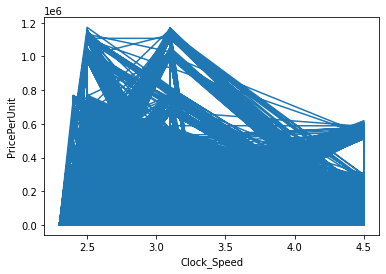

In [253]:
plt.plot(df_rs_qty_gn_rcn["Clock_Speed"], df_rs_qty_gn_rcn["PricePerUnit"])
plt.xlabel("Clock_Speed")
plt.ylabel("PricePerUnit")
plt.show()

In [254]:
# No any relationship with Clock_Speed and PricePerUnit
# remove column "Clock_Speed"
df_rs_qty_gn_rcn = df_rs_qty_gn_rcn.drop(columns=['Clock_Speed'])
df_rs_qty_gn_rcn

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4              6972.0                 3yr  PartialUpfront   convertible   
14             2028.0                 3yr      AllUpfront      standard   
27            20835.0                 3yr  PartialUpfront      standard   
28            40369.0                 1yr      AllUpfront      standard   
73           114945.0                 3yr  PartialUpfront   convertible   
...               ...                 ...             ...           ...   
1897237        1214.0                 1yr      AllUpfront   convertible   
1897243        2810.0                 3yr      AllUpfront      standard   
1897246       59415.0                 1yr      AllUpfront   convertible   
1897247        9091.0                 3yr      AllUpfront      standard   
1897250        1632.0                 3yr  PartialUpfront   convertible   

              Location Memory vCPU Network_Performance Operating_System  Year  
4              US East      8    2          20 Gigabit            Linux  2018  
14        Asia Pacific      8    2          12 Gigabit          Windows  2017  
27             US West    192   48         100 Gigabit             RHEL  2020  
28                  EU    384   96          20 Gigabit            Linux  2020  
73        Asia Pacific    384   96          25 Gigabit          Windows  2019  
...                ...    ...  ...                 ...              ...   ...  
1897237  South America      8    2    Up to 10 Gigabit             SUSE  2019  
1897243             EU      4    2     Up to 5 Gigabit          Windows  2020  
1897246   Asia Pacific     64   16    Up to 10 Gigabit            Linux  2018  
1897247   Asia Pacific     16    4    Up to 25 Gigabit          Windows  2020  
1897250        US West     16    4                High            Linux  2017  

[188728 rows x 10 columns]

In [255]:
from scipy.stats import chi2_contingency

In [256]:
chi2_contingency(pd.crosstab(df_rs_qty_gn_rcn.Operating_System, df_rs_qty_gn_rcn.PricePerUnit))

(253579.18021170315,
 0.0,
 162534,
 array([[0.7817388 , 0.7817388 , 0.7817388 , ..., 1.5634776 , 1.5634776 ,
         0.3908694 ],
        [0.23814166, 0.23814166, 0.23814166, ..., 0.47628333, 0.47628333,
         0.11907083],
        [0.22186427, 0.22186427, 0.22186427, ..., 0.44372854, 0.44372854,
         0.11093214],
        [0.75825527, 0.75825527, 0.75825527, ..., 1.51651053, 1.51651053,
         0.37912763]]))

In [257]:
minvalue = df_rs_qty_gn_rcn['PricePerUnit'].min() 
minvalue

15.0

In [258]:
maxvalue = df_rs_qty_gn_rcn['PricePerUnit'].max() 
maxvalue

1173040.0

In [259]:
meanvalue = df_rs_qty_gn_rcn['PricePerUnit'].mean() 
meanvalue

59720.32501801535

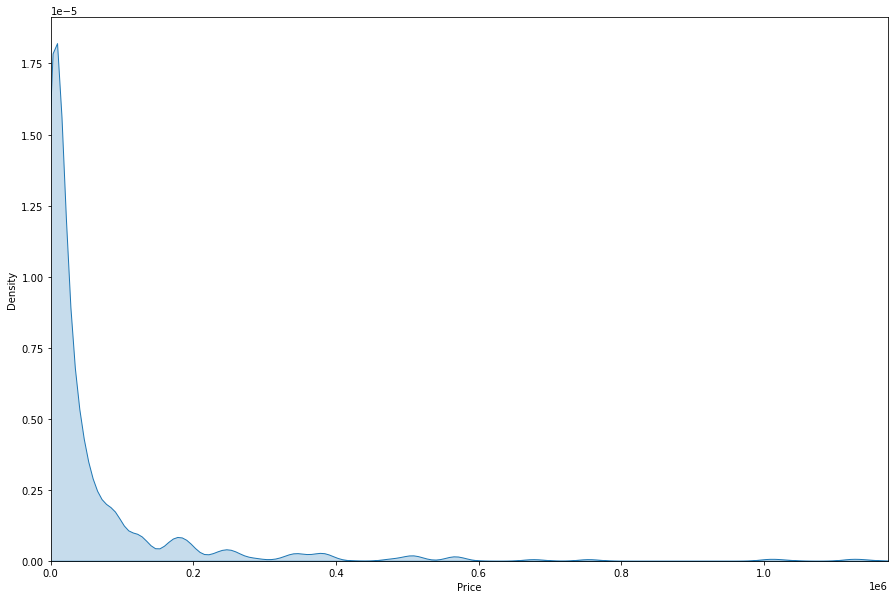

In [260]:
plt.figure(figsize=(15,10))
plt.xlim(0,1173040)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(df_rs_qty_gn_rcn['PricePerUnit'],shade=True)
plt.show()

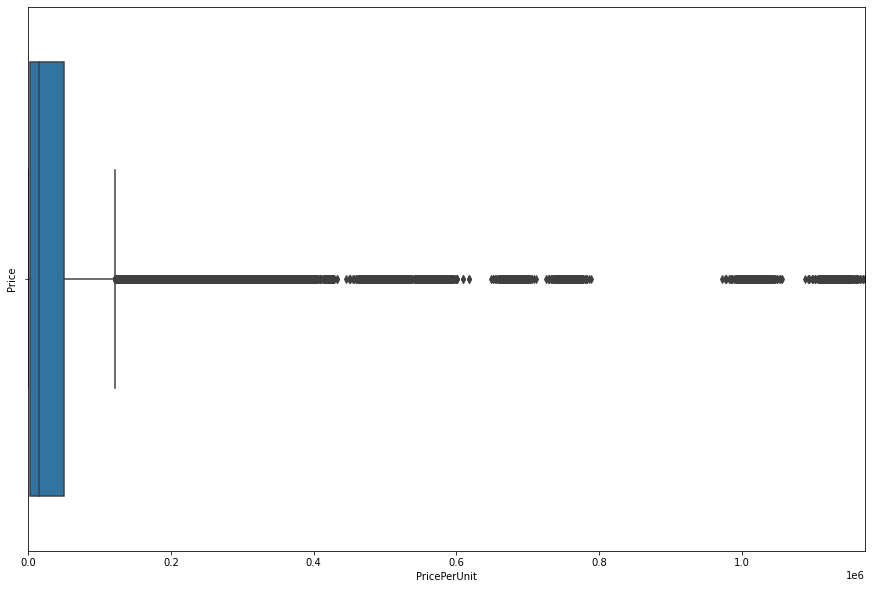

In [261]:
plt.figure(figsize=(15,10))
plt.xlim(0,1173040)
plt.ylabel('Price')
sns.boxplot(x=df_rs_qty_gn_rcn['PricePerUnit'])
plt.show()

In [262]:
df_rs_qty_gn_rcn[df_rs_qty_gn_rcn['PricePerUnit'] > 100000].groupby('PricePerUnit').count()

LeaseContractLength  PurchaseOption  OfferingClass  Location  \
PricePerUnit                                                                 
100008.0                        1               1              1         1   
100023.0                        4               4              4         4   
100024.0                        1               1              1         1   
100027.0                        9               9              9         9   
100030.0                        1               1              1         1   
...                           ...             ...            ...       ...   
1161465.0                       4               4              4         4   
1162780.0                       1               1              1         1   
1165758.0                       4               4              4         4   
1169712.0                       4               4              4         4   
1173040.0                       1               1              1         1   

              Memory  vCPU  Network_Performance  Operating_System  Year  
PricePerUnit                                                             
100008.0           1     1                    1                 1     1  
100023.0           4     4                    4                 4     4  
100024.0           1     1                    1                 1     1  
100027.0           9     9                    9                 9     9  
100030.0           1     1                    1                 1     1  
...              ...   ...                  ...               ...   ...  
1161465.0          4     4                    4                 4     4  
1162780.0          1     1                    1                 1     1  
1165758.0          4     4                    4                 4     4  
1169712.0          4     4                    4                 4     4  
1173040.0          1     1                    1                 1     1  

[13370 rows x 9 columns]

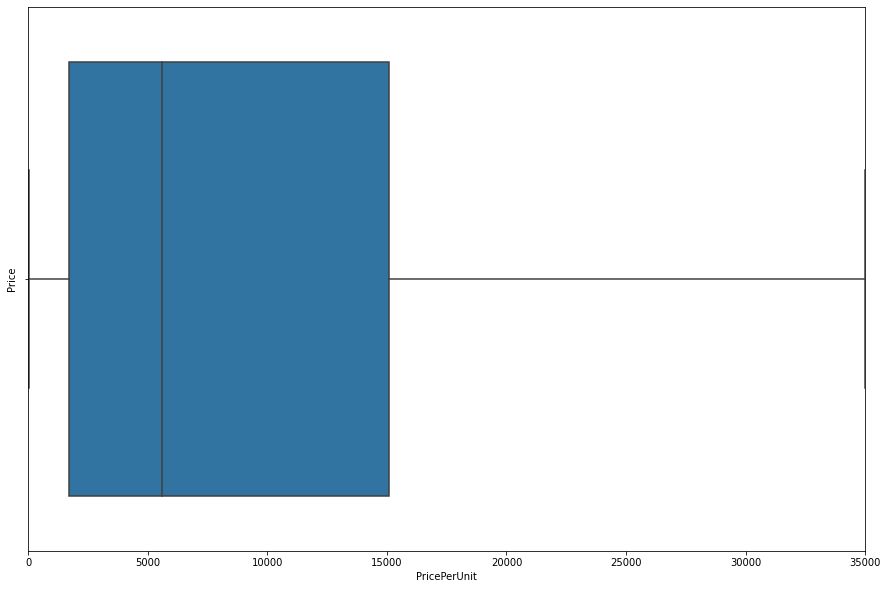

In [263]:
df_rs_qty_gn_rcn.drop(df_rs_qty_gn_rcn.index[(df_rs_qty_gn_rcn["PricePerUnit"] > 35000)],axis=0,inplace=True)
plt.figure(figsize=(15,10))
plt.xlim(0,35000)
plt.ylabel('Price')
sns.boxplot(x=df_rs_qty_gn_rcn['PricePerUnit'])
plt.show()

In [264]:
df_rs_qty_gn_rcn

PricePerUnit LeaseContractLength  PurchaseOption OfferingClass  \
4              6972.0                 3yr  PartialUpfront   convertible   
14             2028.0                 3yr      AllUpfront      standard   
27            20835.0                 3yr  PartialUpfront      standard   
80             8337.0                 1yr  PartialUpfront   convertible   
89            11592.0                 1yr  PartialUpfront   convertible   
...               ...                 ...             ...           ...   
1897232       23074.0                 3yr  PartialUpfront      standard   
1897237        1214.0                 1yr      AllUpfront   convertible   
1897243        2810.0                 3yr      AllUpfront      standard   
1897247        9091.0                 3yr      AllUpfront      standard   
1897250        1632.0                 3yr  PartialUpfront   convertible   

              Location Memory vCPU Network_Performance Operating_System  Year  
4              US East      8    2          20 Gigabit            Linux  2018  
14        Asia Pacific      8    2          12 Gigabit          Windows  2017  
27             US West    192   48         100 Gigabit             RHEL  2020  
80       South America     16    4    Up to 10 Gigabit          Windows  2019  
89             US East    256   64         100 Gigabit             RHEL  2019  
...                ...    ...  ...                 ...              ...   ...  
1897232        US West    160   40          10 Gigabit            Linux  2018  
1897237  South America      8    2    Up to 10 Gigabit             SUSE  2019  
1897243             EU      4    2     Up to 5 Gigabit          Windows  2020  
1897247   Asia Pacific     16    4    Up to 25 Gigabit          Windows  2020  
1897250        US West     16    4                High            Linux  2017  

[128102 rows x 10 columns]

In [265]:
del df_rs_qty_gn_rcn['OfferingClass']
# del df_rs_qty_gn_rcn['Network_Performance']
# del df_rs_qty_gn_rcn['Memory']

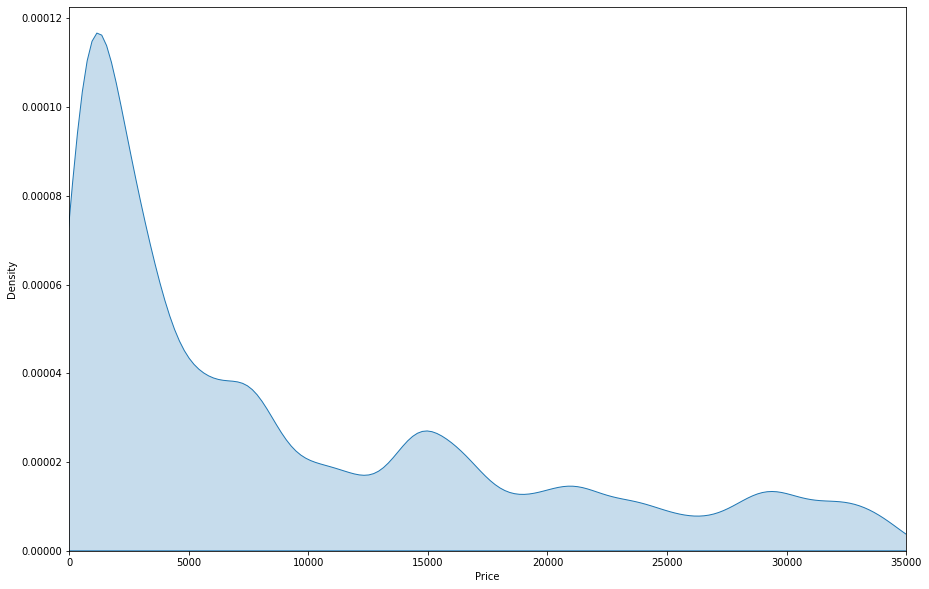

In [266]:
plt.figure(figsize=(15,10))
plt.xlim(0,35000)
plt.xlabel('Price')
plt.ylabel('Density')
sns.kdeplot(df_rs_qty_gn_rcn['PricePerUnit'],shade=True)
plt.show()

In [267]:
df_rs_qty_gn_rcn[df_rs_qty_gn_rcn['PricePerUnit'] <5000]

PricePerUnit LeaseContractLength  PurchaseOption       Location  \
14             2028.0                 3yr      AllUpfront   Asia Pacific   
211            1628.0                 1yr  PartialUpfront   Asia Pacific   
258            4232.0                 1yr  PartialUpfront   Asia Pacific   
284             672.0                 1yr      AllUpfront             EU   
295            3320.0                 1yr      AllUpfront        US East   
...               ...                 ...             ...            ...   
1897217         918.0                 1yr      AllUpfront        US West   
1897228         124.0                 1yr  PartialUpfront             EU   
1897237        1214.0                 1yr      AllUpfront  South America   
1897243        2810.0                 3yr      AllUpfront             EU   
1897250        1632.0                 3yr  PartialUpfront        US West   

        Memory vCPU Network_Performance Operating_System  Year  
14           8    2          12 Gigabit          Windows  2017  
211         32    8     Up to 5 Gigabit            Linux  2020  
258        192   48          10 Gigabit            Linux  2020  
284          2    2     Up to 5 Gigabit             RHEL  2019  
295         32    8     Up to 5 Gigabit            Linux  2019  
...        ...  ...                 ...              ...   ...  
1897217      8    2    Up to 10 Gigabit             SUSE  2017  
1897228      2    2     Up to 5 Gigabit             SUSE  2020  
1897237      8    2    Up to 10 Gigabit             SUSE  2019  
1897243      4    2     Up to 5 Gigabit          Windows  2020  
1897250     16    4                High            Linux  2017  

[60993 rows x 9 columns]

In [268]:
# visualize the relationship between the features and the response using scatterplots
# sns.pairplot(df_rs_qty_gn_rcn, x_vars=['Memory', 'vCPU', 'Operating_System', 'Location', 'Network_Performance'], y_vars='PricePerUnit', size=7, aspect=0.7)

In [269]:
X = df_rs_qty_gn_rcn.drop('PricePerUnit', axis='columns')
y = df_rs_qty_gn_rcn.PricePerUnit

In [270]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

# chain sequential steps together
from sklearn.pipeline import make_pipeline

In [271]:
def fitTransform(colList):
    for col in colList:
        ohe.fit_transform(df_rs_qty_gn_rcn[[col]])
        print(ohe.categories_)

In [272]:
fitTransform(['Memory','vCPU', 'Operating_System', 'Location', 'LeaseContractLength', 'PurchaseOption', 'Year', 'Network_Performance'])

[array(['1', '128', '15', '16', '160', '192', '2', '256', '3', '30', '32',
       '384', '4', '48', '64', '7', '8', '96'], dtype=object)]
[array(['1', '12', '16', '2', '24', '32', '4', '40', '48', '64', '8', '96'],
      dtype=object)]
[array(['Linux', 'RHEL', 'SUSE', 'Windows'], dtype=object)]
[array(['AWS GovCloud', 'Africa', 'Asia Pacific', 'Canada', 'EU',
       'Middle East', 'South America', 'US East', 'US West'], dtype=object)]
[array(['1yr', '3yr'], dtype=object)]
[array(['AllUpfront', 'PartialUpfront'], dtype=object)]
[array(['2016', '2017', '2018', '2019', '2020', '2021'], dtype=object)]
[array(['10 Gigabit', '100 Gigabit', '12 Gigabit', '20 Gigabit',
       '25 Gigabit', 'High', 'Up to 10 Gigabit', 'Up to 25 Gigabit',
       'Up to 5 Gigabit'], dtype=object)]


In [273]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['Memory','vCPU', 'Operating_System', 'Location', 'LeaseContractLength', 'PurchaseOption', 'Year', 'Network_Performance']),
    remainder='passthrough')

In [274]:
column_trans.fit_transform(X)

<128102x62 sparse matrix of type '<class 'numpy.float64'>'
	with 1024816 stored elements in Compressed Sparse Row format>

In [275]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
lenregr = LinearRegression()
polyreg = PolynomialFeatures(degree=2)
logreg = LogisticRegression()

In [276]:
pipe = make_pipeline(column_trans, lenregr)
st_li_pipe = make_pipeline(column_trans, lenregr)

In [277]:
X_new = X.sample(5, random_state=99)
X_new

LeaseContractLength  PurchaseOption      Location Memory vCPU  \
1489522                 1yr  PartialUpfront            EU     32    8   
865286                  1yr  PartialUpfront  Asia Pacific     64   16   
1267693                 3yr      AllUpfront  Asia Pacific    128   32   
1775997                 3yr  PartialUpfront       US East     32    8   
1350639                 3yr  PartialUpfront       US West     16    4   

        Network_Performance Operating_System  Year  
1489522    Up to 25 Gigabit             RHEL  2020  
865286     Up to 10 Gigabit             SUSE  2020  
1267693          25 Gigabit            Linux  2020  
1775997                High          Windows  2016  
1350639    Up to 10 Gigabit            Linux  2018

In [278]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state=9)
train_X

LeaseContractLength  PurchaseOption      Location Memory vCPU  \
1616429                 3yr  PartialUpfront  Asia Pacific    192   48   
1539485                 1yr      AllUpfront  AWS GovCloud     32    8   
1152096                 3yr  PartialUpfront  Asia Pacific     16    4   
1305075                 3yr  PartialUpfront        Africa      8    2   
357444                  3yr  PartialUpfront  Asia Pacific     64   16   
...                     ...             ...           ...    ...  ...   
969338                  1yr  PartialUpfront  Asia Pacific     32    8   
977537                  1yr  PartialUpfront       US West      8    2   
830497                  3yr  PartialUpfront       US East     16    4   
1280525                 1yr      AllUpfront  Asia Pacific      1    2   
1825214                 3yr      AllUpfront            EU     32    8   

        Network_Performance Operating_System  Year  
1616429          10 Gigabit             RHEL  2020  
1539485     Up to 5 Gigabit            Linux  2018  
1152096    Up to 10 Gigabit             RHEL  2018  
1305075    Up to 10 Gigabit             RHEL  2020  
357444     Up to 10 Gigabit          Windows  2020  
...                     ...              ...   ...  
969338     Up to 10 Gigabit            Linux  2019  
977537     Up to 25 Gigabit             RHEL  2019  
830497     Up to 25 Gigabit          Windows  2020  
1280525     Up to 5 Gigabit          Windows  2018  
1825214    Up to 10 Gigabit            Linux  2019  

[102481 rows x 8 columns]

In [279]:
train_X.shape

(102481, 8)

In [280]:
pipe.fit(train_X, train_y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Memory', 'vCPU',
                                                   'Operating_System',
                                                   'Location',
                                                   'LeaseContractLength',
                                                   'PurchaseOption', 'Year',
                                                   'Network_Performance'])])),
                ('linearregression', LinearRegression())])

In [281]:
pipe.predict(X_new)

array([ 3421.1149507 ,  6607.8022734 , 22334.70587512,  9886.05825386,
        5951.610773  ])

In [282]:
df_rs_qty_gn_rcn.dtypes

PricePerUnit           float64
LeaseContractLength     object
PurchaseOption          object
Location                object
Memory                  object
vCPU                    object
Network_Performance     object
Operating_System        object
Year                    object
dtype: object

In [283]:
xtemp = [['1yr', 'AllUpfront', 'Asia Pacific','32', '12', '20 Gigabit', 'Windows', '2020']]  
df_temp = pd.DataFrame(xtemp, columns = ['LeaseContractLength','PurchaseOption','Location','Memory','vCPU','Network_Performance','Operating_System','Year'])  
df_temp

LeaseContractLength PurchaseOption      Location Memory vCPU  \
0                 1yr     AllUpfront  Asia Pacific     32   12   

  Network_Performance Operating_System  Year  
0          20 Gigabit          Windows  2020

In [284]:
pipe.predict(df_temp)

array([18417.07406222])

In [285]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable.

linear_pred = pipe.predict(test_X)
print("RMSE: ", np.sqrt(mean_squared_error(test_y, linear_pred)))
print("R2: ", r2_score(test_y, linear_pred))

RMSE:  5789.044048784531
R2:  0.6344443444391906


In [119]:
# After Standardise y values
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
train_y = train_y.values.reshape(-1, 1)
train_y_st = sc_y.fit_transform(train_y)
test_y = test_y.values.reshape(-1, 1)
test_y_st = sc_y.fit_transform(test_y)

In [120]:
st_li_pipe.fit(train_X, train_y_st)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['vCPU', 'Operating_System',
                                                   'Location',
                                                   'LeaseContractLength',
                                                   'PurchaseOption',
                                                   'Year'])])),
                ('linearregression', LinearRegression())])

In [121]:
# R² score tells us how well our model is fitted to the data by comparing it to the average line of the dependent variable.

st_linear_pred = st_li_pipe.predict(test_X)
print("RMSE: ", np.sqrt(mean_squared_error(test_y_st, linear_pred)))
print("R2: ", r2_score(test_y, linear_pred))

RMSE:  12012.392710096445
R2:  0.6215985612060824


In [80]:
# Neural Network

In [81]:
# df_rs_qty_gn_rcn

In [82]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# # prepare input data
# def prepare_inputs(X_train, X_test):
# 	ohe = OneHotEncoder()
# 	ohe.fit(X_train)
# 	X_train_enc = ohe.transform(X_train)
# 	X_test_enc = ohe.transform(X_test)
# 	return X_train_enc, X_test_enc

In [83]:
# prepare input data
# X_train_enc, X_test_enc = prepare_inputs(train_X, test_X)

In [84]:
# from keras.models import Sequential
# from keras.layers import Dense
# import tensorflow.keras as keras
# from tensorflow.keras import layers
# from keras.layers import LeakyReLU

In [85]:
# # GRADED FUNCTION: price_model
# def price_model(shape):
#     m = Sequential()
#     m.add(Dense(10, activation='relu', input_dim=shape))
#     m.add(LeakyReLU())
#     m.add(Dense(shape*2, activation='relu'))
#     m.add(LeakyReLU())
#     m.add(Dense(1, activation='relu'))
#     m.add(LeakyReLU())
#     m.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    # return m

In [86]:
# history = price_model(X_test_enc.shape[1])

In [87]:
# pipe_nn = make_pipeline(column_trans, history)
# pipe_nn_model = pipe_nn.fit(X_train_enc, train_y, batch_size=64,epochs=20, verbose=2)

In [88]:
# X_train_enc.shape

In [89]:
# Support Vector Regression (SVR)

In [85]:
from sklearn.svm import SVR
regSVR = SVR(kernel = 'rbf',cache_size=7000)
linearSVR = SVR(kernel = 'linear',cache_size=7000)

In [86]:
pipeSVR = make_pipeline(column_trans, regSVR)
pipeLinearSVR = make_pipeline(column_trans, linearSVR)

In [92]:
# pipeSVR.fit(train_X, train_y)

In [93]:
# Predicting a new result

# svr_pred = pipeSVR.predict(X_new)
# svr_pred = train_y.inverse_transform(svr_pred) 

In [94]:
# r2_score_svr = r2_score(test_y, svr_pred)
# print("r2_score_svr: ", r2_score_svr)

In [95]:
# Visualizing the SVR results (for higher resolution and smoother curve)
#this step required because data is feature scaled.
# X_grid = np.arange(min(train_X), max(train_X), 0.01) 
# X_grid = X_grid.reshape((len(X_grid), 1))
# plt.scatter(train_X, train_y, color = 'red')
# plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
# plt.title('Instance Price (SVR)')
# plt.xlabel('Features')
# plt.ylabel('Price ($)')
# plt.show()

In [88]:
pipeSVR.fit(test_X, test_y_st)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Memory', 'vCPU',
                                                   'Operating_System',
                                                   'Location',
                                                   'LeaseContractLength',
                                                   'PurchaseOption',
                                                   'OfferingClass', 'Year',
                                                   'Network_Performance'])])),
                ('svr', SVR(cache_size=7000))])

In [106]:
svr_pred = pipeSVR.predict(train_X.loc[0:5000])

AttributeError: 'numpy.ndarray' object has no attribute 'inverse_transform'

In [122]:
train_y_st

array([[ 0.90654267],
       [ 2.05392293],
       [-0.81063295],
       ...,
       [-0.39768132],
       [-0.90694974],
       [ 2.4552955 ]])

In [123]:
svr_pred

array([16733.27000416,  6325.6696208 ,  1085.7071766 , ...,
        8678.81373359,   592.02495506,  9038.93982253])

In [119]:
svr_pred = sc_y.inverse_transform(svr_pred) 

In [1]:
r2_score_svr = r2_score(train_y_, svr_pred)
print("r2_score_svr: ", r2_score_svr)

NameError: name 'r2_score' is not defined

In [131]:
# pipeLinearSVR.fit(test_X, test_y_st)
# svr_pred_linear = pipeLinearSVR.predict(train_X)

C:\Users\shali\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
